# Final Exam Prep

**Note:** This assignment is graded for accuracy. Solutions are based on the provided solution set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

## Foundational Concepts

**Q1 What is a random variable? Explain the difference between a random variable and a regular variable you might use in algebra.**

A random variable is a function that maps the outcomes of a random phenomenon to a numerical value. Unlike a regular algebraic variable (which usually acts as a placeholder for a specific unknown constant), a random variable can take on a range of different values, each with an associated probability.

**Q2 What distinguishes a continuous random variable from a discrete random variable? Give an example of each.**

A discrete random variable has a countable number of possible outcomes (e.g., the number of heads in 10 coin flips). A continuous random variable takes on values in an uncountable range, such as an interval on the real number line (e.g., the exact time between bus arrivals).

**Q3 What is a cumulative distribution function (CDF)? What are its inputs and what values does it return?**

The CDF, denoted $F(x)$, is a function that defines the probability that a random variable $X$ will take a value less than or equal to $x$. 
*   **Input:** A real number $x$.
*   **Output:** A probability between 0 and 1, specifically $P(X \le x)$.

**Q4 How would you use the probability density function (PDF) to find P(a < X < b)?**

You calculate the area under the curve of the PDF $f(x)$ between $a$ and $b$ using integration:
$$ P(a < X < b) = \int_{a}^{b} f(x) dx $$

**Q5 Explain the relationship between a PDF and a CDF. How would you calculate one from the other?**

The PDF is the derivative of the CDF, and the CDF is the integral of the PDF.
*   From CDF to PDF: $f(x) = \frac{d}{dx}F(x)$
*   From PDF to CDF: $F(x) = \int_{-\infty}^{x} f(t) dt$

## Probability

**Q6 The probability density function for an exponential distribution with rate parameter $\lambda$ is:**
$$ f(x) = \lambda e^{-\lambda x}, \quad x \ge 0 $$
Suppose buses arrive at a bus stop according to an exponential distribution with rate $\lambda = 0.5$ per minute.

**(A) Write Python code using `scipy.stats.expon` to plot the PDF of the exponential distribution with rate $\lambda = 0.5$. On the same plot, add the PDF for an exponential distribution with rate $\lambda = 1.0$ (scale = 1).**

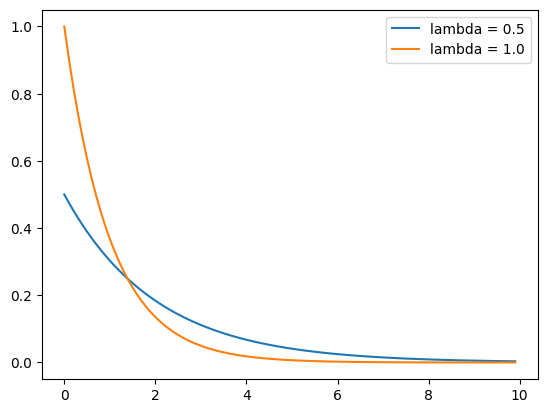

In [2]:
x = np.arange(0, 10, 0.1)
y = st.expon.pdf(x, scale = 1/0.5)

plt.figure()
plt.plot(x, y, label = "lambda = 0.5")

y2 = st.expon.pdf(x, scale = 1/1)
plt.plot(x, y2, label = "lambda = 1.0")
plt.legend()
plt.show()

**(B) What is the average waiting time for both distributions?**

The mean of an exponential distribution is $1/\lambda$.
*   For $\lambda = 0.5$: Mean = $1/0.5 = 2$ minutes.
*   For $\lambda = 1.0$: Mean = $1/1.0 = 1$ minute.

**Q7 The probability density function for a normal distribution is:**
$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $$

**(A) Let the mean $\mu = 50$ and standard deviation $\sigma = 10$. Plot the density.**

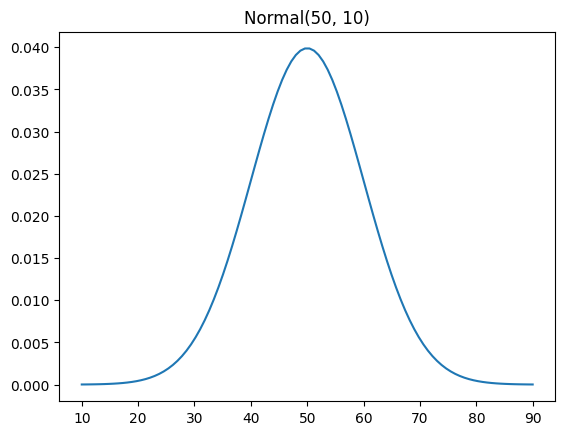

In [3]:
mu = 50
sigma = 10
x_norm = np.linspace(10, 90, 100)
y_norm = st.norm.pdf(x_norm, loc=mu, scale=sigma)

plt.figure()
plt.plot(x_norm, y_norm)
plt.title("Normal(50, 10)")
plt.show()

**(B) Generate N=100 values from a Normal(50, 10) distribution. What proportion of your sample falls within one standard deviation of the mean (between 40 and 60)?**

In [4]:
y = st.norm.rvs(loc=50, scale=10, size=100, random_state=1)
observed_proportion = ((40 < y) & (y <= 60)).mean()
print(observed_proportion)

0.76


**(C) The theoretical proportion is 68%. Calculate the simulation error (absolute difference).**

In [5]:
true_proportion = st.norm.cdf(60, 50, 10) - st.norm.cdf(40, 50, 10)
sim_error = np.abs(observed_proportion - true_proportion)
print(sim_error)

0.07731050786291416


**(D) Repeat (B) and (C) 10,000 times. Create a histogram of the simulation error with 100 bins.**

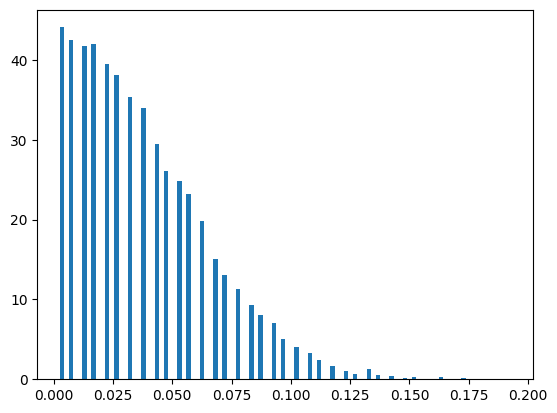

In [6]:
def sim(n):
    y = st.norm.rvs(loc=50, scale=10, size=n)
    observed_proportion = ((40 < y) & (y <= 60)).mean()
    true_proportion = st.norm.cdf(60, 50, 10) - st.norm.cdf(40, 50, 10)
    sim_error = np.abs(observed_proportion - true_proportion)
    return sim_error

out = [sim(100) for i in range(10000)]

plt.figure()
plt.hist(out, bins=100, density=True)
plt.show()

**(E) Repeat (D) with N=1000. Create a plot which overlays the histogram of the simulation errors from part (D) and part (E).**

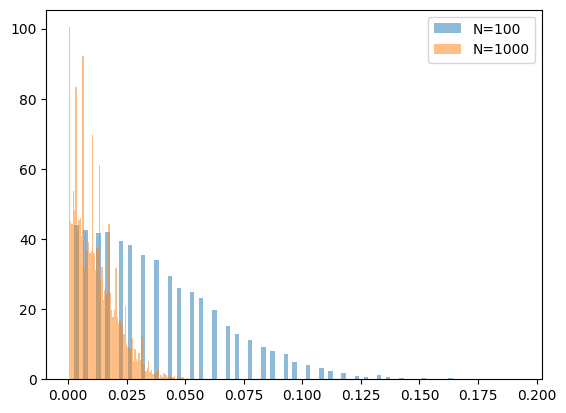

In [7]:
out2 = [sim(1000) for i in range(10000)]

plt.figure()
plt.hist(out, bins=100, density=True, label="N=100", alpha=0.5)
plt.hist(out2, bins=100, density=True, label="N=1000", alpha=0.5)
plt.legend()
plt.show()

**(F) What do the differences in the histograms in part (E) indicate?**

The simulation error is, on average, much smaller when N is 1000 compared to when N is 100. The histogram for N=1000 is clustered much closer to zero.

**Q8 The probability density function for a gamma distribution with shape parameter $k$ and rate parameter $\lambda$ is:**
$$ f(x) = \frac{\lambda^k}{\Gamma(k)} x^{k-1}e^{-\lambda x}, \quad x \ge 0 $$

**(A) In a single figure, plot the density functions when $\lambda=1$ and $k=1, 2, 3,$ and $5$.**

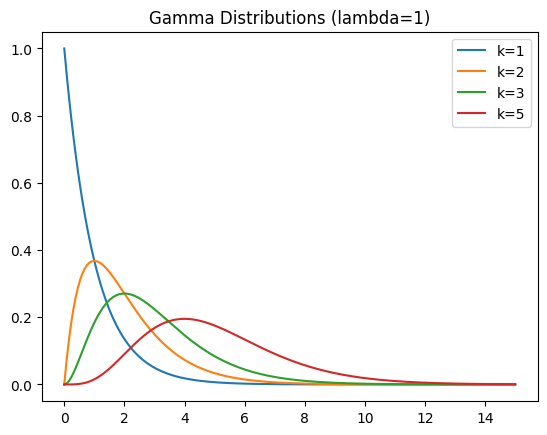

In [8]:
x_gamma = np.linspace(0, 15, 200)
ks = [1, 2, 3, 5]
lam = 1

plt.figure()
for k in ks:
    # scipy stats uses scale = 1/lambda
    y_gamma = st.gamma.pdf(x_gamma, a=k, scale=1/lam)
    plt.plot(x_gamma, y_gamma, label=f'k={k}')

plt.legend()
plt.title("Gamma Distributions (lambda=1)")
plt.show()

**(B) Describe how the shape of the distribution changes as $k$ increases.**

As $k$ increases, the distribution becomes more symmetric (bell-shaped) and the peak (mode) shifts to the right.

**(C) Generate 10,000 random samples from a Gamma(5, 2) distribution. Calculate the sample mean. How does it compare to the theoretical mean $k/\lambda = 5/2 = 2.5$?**

In [9]:
# k=5, lambda=2 -> scale=1/2=0.5
gamma_samples = st.gamma.rvs(a=5, scale=0.5, size=10000)
sample_mean = np.mean(gamma_samples)
print(f"Sample Mean: {sample_mean}")
print("Theoretical Mean: 2.5")

Sample Mean: 2.500070607213811
Theoretical Mean: 2.5


**(D) Create a histogram with 100 bins of your simulated values and overlay the theoretical PDF. Do they match?**

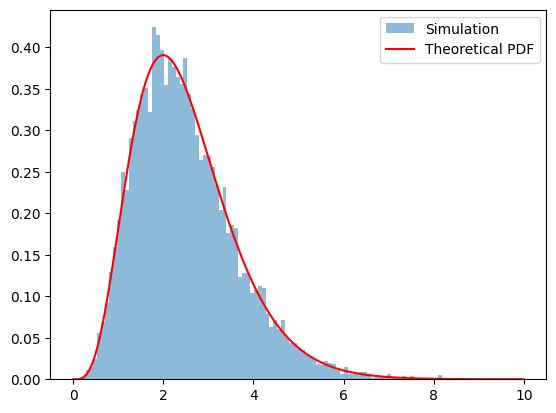

In [10]:
plt.figure()
plt.hist(gamma_samples, bins=100, density=True, alpha=0.5, label='Simulation')

x_g = np.linspace(0, 10, 200)
y_g = st.gamma.pdf(x_g, a=5, scale=0.5)
plt.plot(x_g, y_g, color='red', label='Theoretical PDF')

plt.legend()
plt.show()

**Q9 The probability density function for a beta distribution with shape parameters $\alpha$ and $\beta$ is:**
$$ f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1}(1-x)^{\beta-1}, \quad 0 \le x \le 1 $$

**(A) On the same plot, show beta distributions with $\alpha = \beta = 1$, $\alpha = \beta = 2$, and $\alpha = \beta = 5$.**

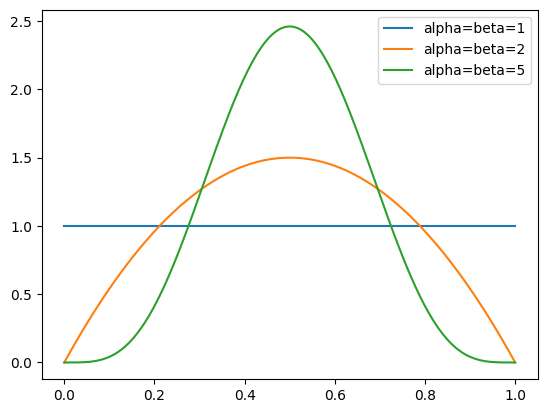

In [11]:
x_beta = np.linspace(0, 1, 200)
params = [(1, 1), (2, 2), (5, 5)]

plt.figure()
for a, b in params:
    y_beta = st.beta.pdf(x_beta, a, b)
    plt.plot(x_beta, y_beta, label=f'alpha=beta={a}')

plt.legend()
plt.show()

**(B) In the same figure, plot Beta(2, 5) and Beta(5, 2).**

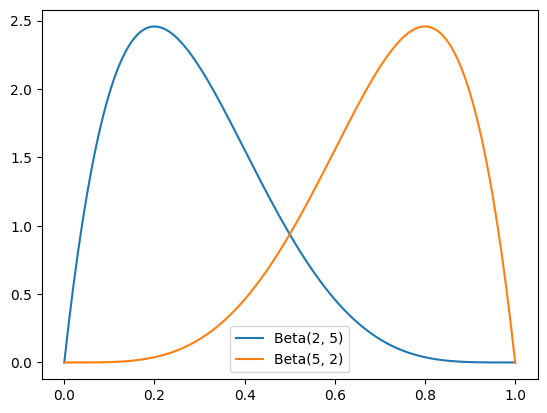

In [12]:
plt.figure()
plt.plot(x_beta, st.beta.pdf(x_beta, 2, 5), label='Beta(2, 5)')
plt.plot(x_beta, st.beta.pdf(x_beta, 5, 2), label='Beta(5, 2)')
plt.legend()
plt.show()

**(C) Comparing the plots in (A) and (B), what happens when $\alpha = \beta$? Describe the shape. What happens when $\alpha > \beta$? Describe the shape.**

*   When $\alpha = \beta$, the distribution is symmetric around 0.5. If they equal 1, it's uniform; if greater than 1, it's bell-shaped.
*   When $\alpha > \beta$, the distribution is left-skewed (mass is concentrated on the right side, closer to 1).

**Q10 A mixture distribution combines two or more probability distributions.**
**(A) Give an example of a real-world situation where a mixture distribution might be appropriate.**

The distribution of heights in a general adult population is a mixture of two normal distributions: one for adult males and one for adult females.

**(B) Generate 10,000 samples from the mixture of two normals: $0.6 \times \text{Normal}(20, 3) + 0.4 \times \text{Normal}(30, 2)$. Create a histogram and overlay the theoretical mixture density.**

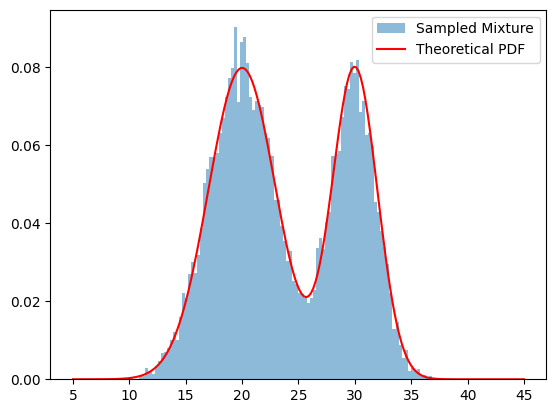

In [13]:
n_samples = 10000
# choose component 1 or 2 based on weights
component = np.random.choice([1, 2], size=n_samples, p=[0.6, 0.4])
# generate values
samples = np.where(component == 1, 
                   st.norm.rvs(loc=20, scale=3, size=n_samples), 
                   st.norm.rvs(loc=30, scale=2, size=n_samples))

plt.figure()
plt.hist(samples, bins=100, density=True, alpha=0.5, label='Sampled Mixture')

# theoretical pdf
x_mix = np.linspace(5, 45, 200)
pdf_mix = 0.6 * st.norm.pdf(x_mix, 20, 3) + 0.4 * st.norm.pdf(x_mix, 30, 2)
plt.plot(x_mix, pdf_mix, color='red', label='Theoretical PDF')
plt.legend()
plt.show()

## Expected Value and Variance

**Q11**
**(A) What does the expected value (mean) of a random variable represent?**
It represents the long-run average value of the random variable or the center of mass of the probability distribution.

**(B) For a continuous random variable X with density f(x), write the formula for E[X].**
$$ E[X] = \int_{-\infty}^{\infty} x f(x) dx $$

**(C) For a continuous random variable X with density f(x), write the formula for E[X²]?**
$$ E[X^2] = \int_{-\infty}^{\infty} x^2 f(x) dx $$

**(D) Write the formula for Var(X) in terms of E[X] and E[X²].**
$$ Var(X) = E[X^2] - (E[X])^2 $$

**(E) What is the relationship between variance and standard deviation?**
Standard Deviation = $\sqrt{\text{Variance}}$.

**(F) What is an advantage of the standard deviation compared to the variance?**
The standard deviation is expressed in the same units as the original data, whereas variance is in squared units.

**Q12 Suppose X has density function $f(x) = 2x$ for $0 \le x \le 1$, and $f(x) = 0$ otherwise.**

**(A) Calculate E[X] using the integral formula.**
$$ E[X] = \int_{0}^{1} x(2x) dx = \int_{0}^{1} 2x^2 dx = \left[ \frac{2x^3}{3} \right]_0^1 = \frac{2}{3} $$

**(B) Calculate E[X²].**
$$ E[X^2] = \int_{0}^{1} x^2(2x) dx = \int_{0}^{1} 2x^3 dx = \left[ \frac{2x^4}{4} \right]_0^1 = \frac{1}{2} $$

**(C) Calculate Var(X).**
$$ Var(X) = E[X^2] - (E[X])^2 = \frac{1}{2} - \left(\frac{2}{3}\right)^2 = \frac{1}{2} - \frac{4}{9} = \frac{9}{18} - \frac{8}{18} = \frac{1}{18} $$

**Q13 If you have a function g(x) that has the right shape for a density (g(x)>0) but doesn't integrate to 1, how do you find the normalizing constant c so that c·g(x) is a valid PDF?**

You calculate the integral of $g(x)$ over its domain, say $K = \int g(x) dx$. The normalizing constant is $c = 1/K$.

**Q14 Suppose we have $f(x) = c \cdot x^2$ for $0 \le x \le 2$, and $f(x) = 0$ otherwise. Find the value of c that makes this a valid probability density function.**

$$ \int_{0}^{2} c x^2 dx = c \left[ \frac{x^3}{3} \right]_0^2 = c \frac{8}{3} $$
Set equal to 1:
$$ c \frac{8}{3} = 1 \implies c = \frac{3}{8} $$

**Q15 Consider $f(x) = c \cdot e^{-x}$ for $x \ge 1$. Find the normalizing constant c.**

$$ \int_{1}^{\infty} c e^{-x} dx = c \left[ -e^{-x} \right]_1^{\infty} = c (0 - (-e^{-1})) = c e^{-1} = \frac{c}{e} $$
Set equal to 1:
$$ \frac{c}{e} = 1 \implies c = e $$

**Q16 Suppose X has density $f(x) = 3x^2$ for $0 \le x \le 1$. Calculate $P(0.25 < X < 0.75)$ by integration.**

$$ P(0.25 < X < 0.75) = \int_{0.25}^{0.75} 3x^2 dx = \left[ x^3 \right]_{0.25}^{0.75} = 0.75^3 - 0.25^3 $$
$$ = 0.421875 - 0.015625 = 0.40625 $$

## Estimation
**Q17 The following data are believed to be from the Rayleigh distribution:**
$$ f(x) = \frac{x}{\theta} e^{-\frac{x^2}{2\theta}}, \quad x \ge 0 $$

In [14]:
np.random.seed(1)
d1 = 3*np.sqrt(-2*np.log(1-np.random.uniform(size=10)))
print(d1)

[3.1165534  4.78897218 0.04537471 2.54562951 1.69019902 1.32057173
 1.92615249 2.76253085 3.01631327 3.73246245]


**(A) Calculate the maximum likelihood estimate of $\theta$.**

The log-likelihood function is:
$$ \ell(\theta) = \sum_{i=1}^n \left( \log(x_i) - \log(\theta) - \frac{x_i^2}{2\theta} \right) $$
Taking the derivative with respect to $\theta$ and setting to 0:
$$ \frac{d}{d\theta} \ell(\theta) = -\frac{n}{\theta} + \frac{1}{2\theta^2} \sum x_i^2 = 0 $$
Solving for $\theta$:
$$ \hat{\theta} = \frac{1}{2n} \sum_{i=1}^n x_i^2 $$

In [15]:
theta_hat = np.mean(d1**2)/2
print("Estimate theta:", f'{theta_hat:.3f}')

Estimate theta: 3.905


**(B) Create a plot of the estimated density function.**

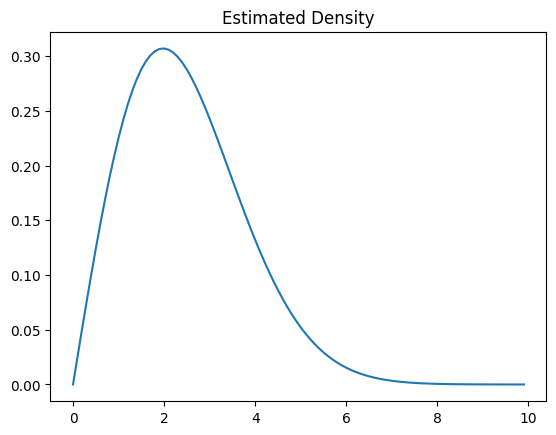

In [16]:
def f(x,theta):
    return x/theta*np.exp(-x**2/2/theta)

xx = np.arange(0, 10, .1)
yy = f(xx, theta_hat)

plt.figure()
plt.plot(xx, yy)
plt.title("Estimated Density")
plt.show()

**(C) With the estimated distribution, calculate $P(X \le 1)$.**

In [17]:
# cdf of rayleigh is 1 - exp(-x^2 / (2*theta))
p_le_1 = 1 - np.exp(-1**2 / (2 * theta_hat))
print(f"P(X <= 1) = {p_le_1}")

P(X <= 1) = 0.1201809507311572


## Simulation
**Q18 Consider a system composed of two sensors, A and B, in sequence.**
The system fails when either A or B fails. A follows Exponential (mean 3), B follows Weibull (scale 3, shape 2).

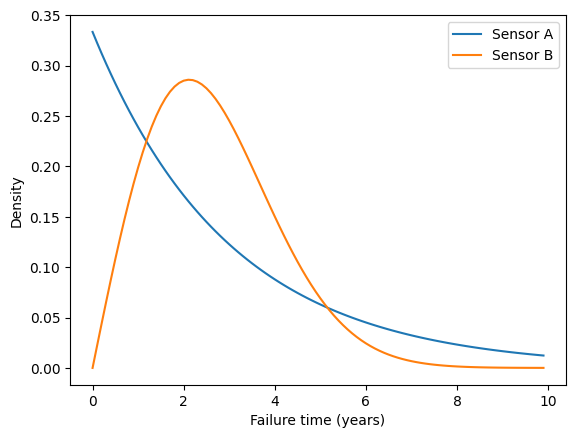

In [18]:
xx = np.arange(0,10,0.1)
zz = st.expon.pdf(xx, scale=3)
yy = st.weibull_min.pdf(xx, c = 2, scale = 3)

plt.figure()
plt.plot(xx,zz, label = "Sensor A")
plt.plot(xx,yy, label = "Sensor B")
plt.xlabel("Failure time (years)")
plt.ylabel("Density")
plt.legend()
plt.show()

The system failure time is $S_F = \min(A_F, B_F)$. We simulate the distribution and summary statistics.

In [19]:
R = 10000
AF = st.expon.rvs(size=R, scale=3)
BF = st.weibull_min.rvs(size=R, c=2, scale=3)
SF = np.minimum(AF, BF)

Summary = {
    "Mean":f"{SF.mean().item():.2f} (years)",
    "Median":f"{np.median(SF).item():.2f} (years)",
    "SD":f"{np.std(SF).item():.2f} (years)",
    "Var":f"{np.var(SF).item():.2f} (years^2)"
}

sum1 = pd.DataFrame.from_dict(Summary, orient = "index", columns= ["Initial"])
print(sum1)

               Initial
Mean      1.64 (years)
Median    1.41 (years)
SD        1.19 (years)
Var     1.42 (years^2)


Consider an improved system with parallel sensors. New system fails if all A's fail OR all B's fail.

**(A) Using simulation, generate a density estimate... Compare to previous.**
**(B) Add another column to the table...**

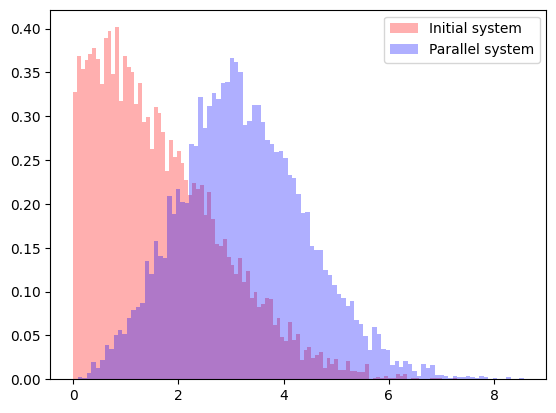

               Initial        Parallel
Mean      1.64 (years)    3.24 (years)
Median    1.41 (years)    3.16 (years)
SD        1.19 (years)    1.21 (years)
Var     1.42 (years^2)  1.48 (years^2)


In [20]:
R = 10000
# three sensors of each type
AF_par = st.expon.rvs(size=(R,3), scale=3)
BF_par = st.weibull_min.rvs(size=(R,3), c=2, scale=3)

As = np.amax(AF_par, axis=1)
Bs = np.amax(BF_par, axis=1)
SF2 = np.minimum(As, Bs)

plt.figure()
plt.hist(SF, bins = 100, density=True, color="#ff000050", label = "Initial system")
plt.hist(SF2, bins = 100, density=True, color="#0000ff50", label = "Parallel system")
plt.legend()
plt.show()

Summary2 = {
    "Mean":f"{SF2.mean().item():.2f} (years)",
    "Median":f"{np.median(SF2).item():.2f} (years)",
    "SD":f"{np.std(SF2).item():.2f} (years)",
    "Var":f"{np.var(SF2).item():.2f} (years^2)"
}
sum1 = sum1.assign(Parallel = Summary2)
print(sum1)

**(C) Create a single figure with the eCDF of both systems.**

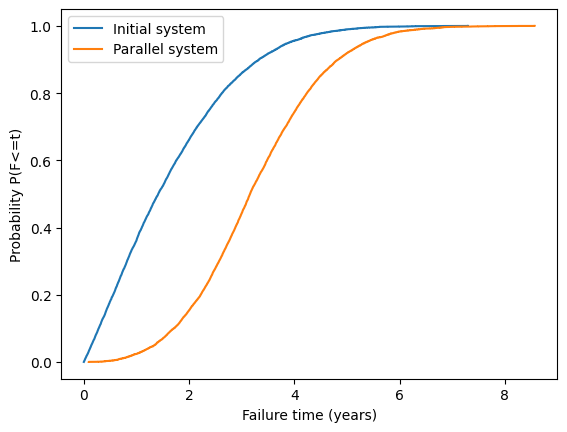

In [21]:
f1 = ECDF(SF)
f2 = ECDF(SF2)

plt.figure()
plt.step(f1.x, f1.y, where='post', label = "Initial system")
plt.step(f2.x, f2.y, where='post', label = "Parallel system")
plt.legend()
plt.xlabel("Failure time (years)")
plt.ylabel("Probability P(F<=t)")
plt.show()

**Q19 Ball bearings from machine A (Normal(10, 0.1)) and B (Normal(10, 0.025)). Machine A produces 2 for every 1 from B.**

**(A) Generate a plot of the marginal density of ball bearing diameters.**

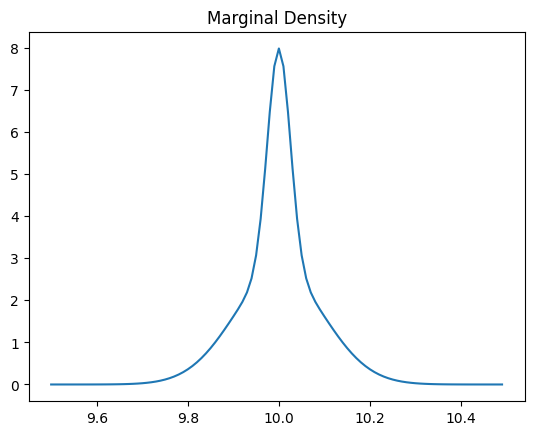

In [22]:
xx = np.arange(9.5, 10.5, 0.01)
ay = st.norm.pdf(xx, loc = 10, scale = 0.1)
by = st.norm.pdf(xx, loc = 10, scale = 0.025)
yy = (2/3)*ay + (1/3)*by

plt.figure()
plt.plot(xx, yy)
plt.title("Marginal Density")
plt.show()

**(B) Calculate the probability that a randomly selected ball bearing came from machine B given that its diameter is 9.9.**

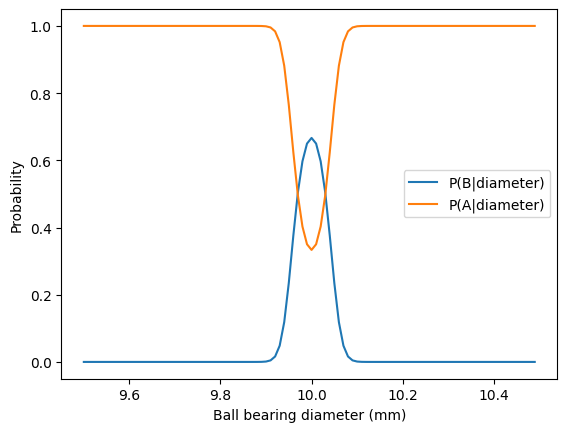

In [23]:
# using bayes theorem logic across the range
bd = (1/3)*by / ((2/3)*ay + (1/3)*by)
ad = (2/3)*ay / ((2/3)*ay + (1/3)*by)

plt.figure()
plt.plot(xx, bd, label = "P(B|diameter)")
plt.plot(xx, ad, label = "P(A|diameter)")
plt.legend()
plt.xlabel("Ball bearing diameter (mm)")
plt.ylabel("Probability")
plt.show()

**Q20 The Monty Hall problem.**

**(A) Use simulation to determine the probability that each strategy wins (Stay vs Switch) for 3 doors.**

In [24]:
R = 10000
initial_choice = 1
car_door = np.random.randint(1, 3+1, size=R)
stay_win = 1*(car_door == initial_choice)

switch_win = []
for i in range(R):
    if car_door[i] == initial_choice:
        # if we picked car, switching loses (0)
        switch_win.append(0)
    else:
        # if we picked goat, host opens other goat, switching wins (1)
        switch_win.append(1)

out = {"Stay": stay_win, "Switch": switch_win}
pd1 = pd.DataFrame(out)
print(pd.crosstab(pd1["Stay"], pd1["Switch"], normalize=True))

Switch       0       1
Stay                  
0       0.0000  0.6652
1       0.3348  0.0000


**(B) Modify the code so that it works for a game with N=4 doors. Calculate probability of winning.**

In [25]:
R = 10000
N = 4
initial_choice = 1
car_door = np.random.randint(1, N+1, size=R)
stay_win = 1*(car_door == initial_choice)

switch_win = []
for i in range(R):
    if car_door[i] == initial_choice:
        switch_win.append(0)
    else:
        # if we initially picked a goat, host opens a DIFFERENT goat.
        # we switch to one of the remaining doors (n-2 available). 
        # one is car, others are goats.prob of hitting car is 1/(n-2).
        # the solution code simulates a random choice among remaining.
        win = 1*(np.random.randint(1, N-1, size=1).item() == 1)
        switch_win.append(win)

out = {"Stay": stay_win, "Switch": switch_win}
pd1 = pd.DataFrame(out)
print(pd.crosstab(pd1["Stay"], pd1["Switch"], normalize=True))

Switch       0       1
Stay                  
0       0.3699  0.3863
1       0.2438  0.0000
